## Olist

L'objectif est de proposer à l’equipe marketing une description actionable d'une segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basee sur une analyse de la stabilite des segments au cours du temps.

Commencons par une analyse des donnees

In [1]:
import numpy as np
import pandas as pd
from math import sin,cos,sqrt,pi,asin
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#lecture des datasets
root_path = "C:/Users/leila/openclassrooms/projet5/olist/"
client = pd.read_csv(root_path + "olist_customers_dataset.csv")
geo = pd.read_csv(root_path + "olist_geolocation_dataset.csv")
item = pd.read_csv(root_path + "olist_order_items_dataset.csv")
pay = pd.read_csv(root_path + "olist_order_payments_dataset.csv")
review = pd.read_csv(root_path + "olist_order_reviews_dataset.csv")
orders = pd.read_csv(root_path + "olist_orders_dataset.csv")
produits = pd.read_csv(root_path + "olist_products_dataset.csv")
sellers = pd.read_csv(root_path + "olist_sellers_dataset.csv")
cat_en = pd.read_csv(root_path + "product_category_name_translation.csv")

In [3]:
client.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Aucune valeur manquante.  
La clé liant ce fichier à celui des clients est geolocation_zip_code_prefix

In [6]:
from unicodedata import normalize
geo['geolocation_city'] =geo['geolocation_city'].apply(lambda x: normalize('NFKD',x).encode('ascii',
                                                                errors='ignore').decode('utf-8'))


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Ce fichier de commandes est relie a celui des clients par customer_id. Il contient l'etat de la commande et differentes dates concernant la commande. On a des valeurs manquantes pour les dates concernant les commandes non encore traitees

In [8]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Le detail des commandes relie au fichier precedent par la cle order_id. Le fichier donne la liste des produits de la commande, l'identifiant de chaque produit, l'identifiant du vendeur, le prix de la commande et le cout de fret (si plusieurs lignes pour la commande le cout de fret est reparti sur les differentes lignes).

In [9]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


payment_sequential indique le nombre de methodes de paiement utilise donc le nombre de ligne concernes par la commande et payment_installments concerne le nombre de versements.

In [10]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Concerne l'avis des clients avec une note et des commentaires, les commentaires concernent moins de la moitie des commandes

In [11]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Tout ce que l'on doit savoir sur les produits. On a la traduction en anglais de la categorie de produits dans le fichier cat_en

In [12]:
cat_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [13]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Concerne l'identification des vendeurs et leur localisation

Nous allons faire les jointures des fichiers en utilisant le schema suivant du site
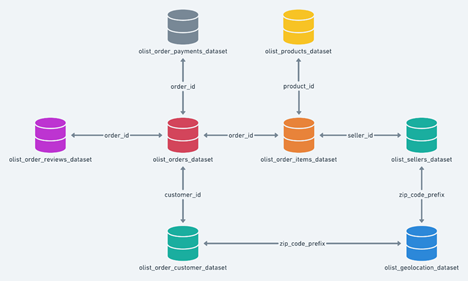
 

In [14]:
# commencons par simplifier produits en utilisant la categorie en anglais 
produits = pd.merge(produits,cat_en,how='left', on='product_category_name')
products = produits[['product_id','product_photos_qty','product_category_name_english']]

#changeons le nom de la colonne concernant la categorie
products = products.rename(columns={'product_category_name_english': 'product_category_name'})
products.head()


,product_id,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,art
2,96bd76ec8810374ed1b65e291975717f,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,4.0,housewares


Text(0.5, 1.0, ' Nombre de produits par categorie')

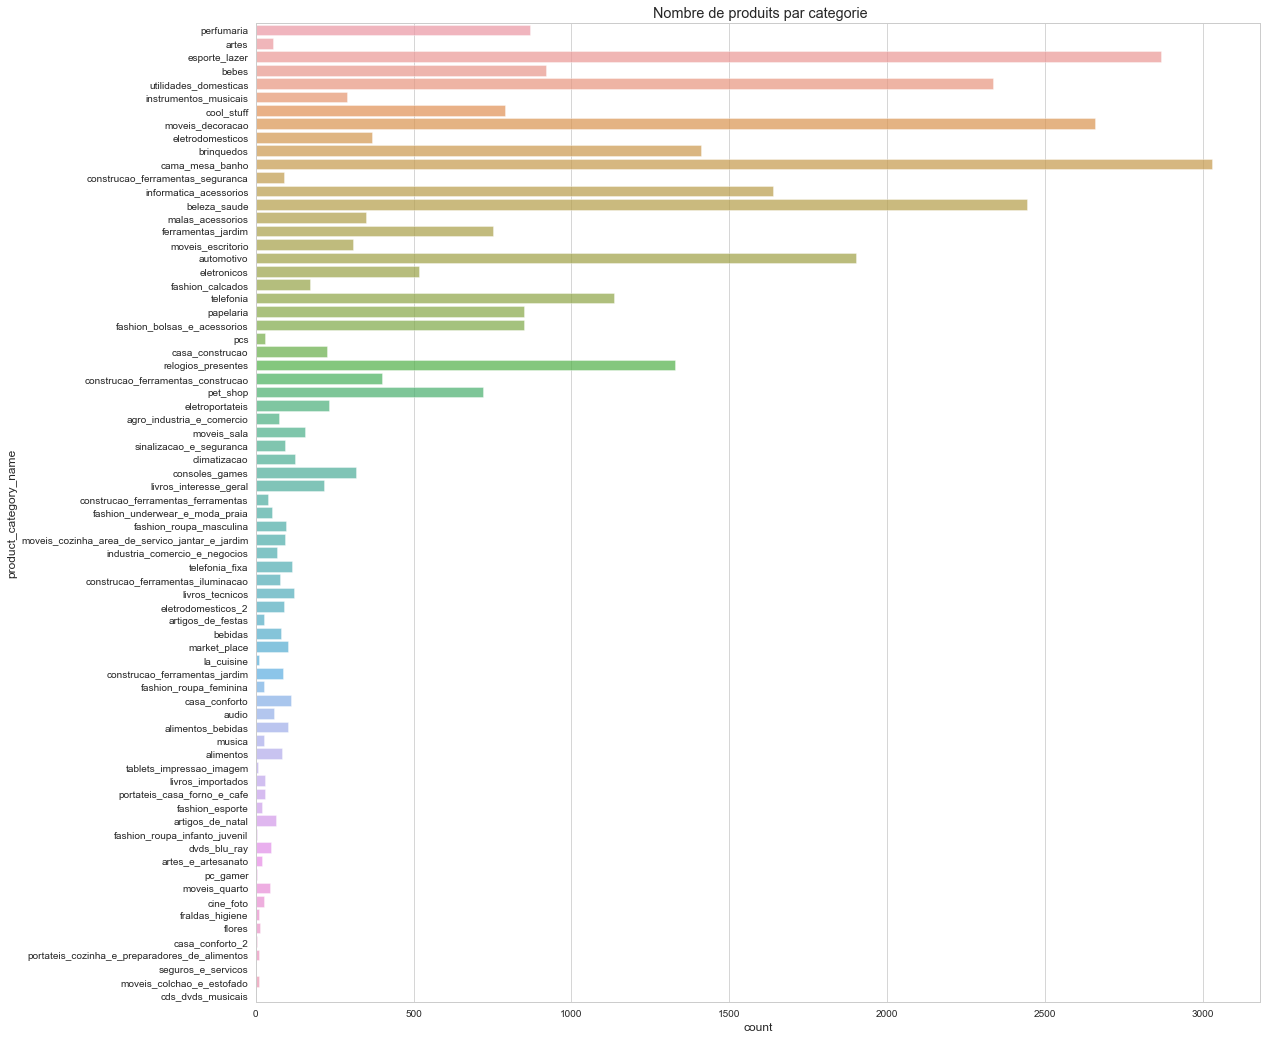

In [15]:
# representation du nombre de produits par categorie
fig = plt.figure(figsize=(18,18))
sns.countplot(data=produits,y='product_category_name',alpha=0.7)

plt.title(' Nombre de produits par categorie')

Il y a beaucoup trop de categories differentes. Il faudra changer ces categories mais lorsque l'on connaitra la repartition par commande ou client

**Regroupement des datasets**

In [16]:
#suppression de certaines colonnes avant jointure
order_items = item.drop('shipping_limit_date',axis=1)
orders_to_items = orders.drop(['order_approved_at','order_delivered_carrier_date',
                               'order_estimated_delivery_date'],axis=1)

#jointure des deux data
order_items = pd.merge(order_items,orders_to_items,how='left',on='order_id')

order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   customer_id                    112650 non-null  object 
 7   order_status                   112650 non-null  object 
 8   order_purchase_timestamp       112650 non-null  object 
 9   order_delivered_customer_date  110196 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 9.5+ MB


On ne garde que les commandes qui ont ete livrees ce qui represente 97 % des commandes

In [17]:
order_items = order_items[order_items['order_status']=='delivered']

Utilisation du format datetime64 NS pour les dates afin de pouvoir calculer simplement des durees ou selectionner des periodes

In [18]:
order_items['order_purchase_timestamp'] = order_items['order_purchase_timestamp'].astype('datetime64[ns]')
order_items['order_delivered_customer_date'] = order_items['order_delivered_customer_date'].astype('datetime64[ns]')

**Les paiements**  

En regardant le site nous voyons que 74 % des paiements se font par carte bancaire donc la colonne payment_type ne va pas nous servir. 

Regardons payment_sequential 

In [19]:
len(pay[pay['payment_sequential']>1])

4526

Le payment_sequential cree des lignes supplementaires par commande des que la valeur est superieure ou egale a 2. On doit donc regrouper les lignes avant de pouvoir joindre ce fichier  a celui d'item.  
Il faut garder le nombre de moyens de paiement et le nombre d'echeances des paiements. Creons pour cela une colonne nb_diff_payment et une colonne nb_payment_installments

In [20]:
grp_pay = pay.groupby(by='order_id').agg({'payment_sequential': 'count','payment_installments': 'sum'})

#on peut alors faire la jointure avec item
order_items=pd.merge(order_items,grp_pay,how='left',on='order_id')

#on change alors le nom des colonnes qui ont ete modifiees
order_items=order_items.rename(columns={'payment_sequential':'nb_diff_payment',
                                        'payment_installments':'nb_payment_installments'})

order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_diff_payment,nb_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1.0,3.0


In [21]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   seller_id                      110197 non-null  object        
 4   price                          110197 non-null  float64       
 5   freight_value                  110197 non-null  float64       
 6   customer_id                    110197 non-null  object        
 7   order_status                   110197 non-null  object        
 8   order_purchase_timestamp       110197 non-null  datetime64[ns]
 9   order_delivered_customer_date  110189 non-null  datetime64[ns]
 10  nb_diff_payment                110194 non-null  float64       
 11  

**Les avis clients**  

Nous avons vu que les commentaires sont peu nombreux. Ne parlant pas portugais, ce qui me semble interessant est de savoir si oui ou non une note est attribuee a la commande et si oui quelle est la note.  
On commence donc par grouper par commande la moyenne des notes et le nombre d'avis. On pourra alors effectuer la jointure avec item

In [22]:
grp_review = review.groupby(by='order_id').agg({'review_id':'count','review_score':'mean'})

order_items = pd.merge(order_items,grp_review,how='left',on='order_id')
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_diff_payment,nb_payment_installments,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.0,2.0,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1.0,3.0,1,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,5.0,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.0,2.0,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1.0,3.0,1,5.0


la colonne review_id, correspond a une commande notee si la valeur est 1, sinon a une commande non notee. Il est donc preferable de remplacer les valeurs par True ou False et donc de donner le nom is_review a la colonne.

In [23]:
order_items = order_items.rename(columns={'review_id':'is_review'})
order_items['is_review'] = order_items['is_review'].apply(lambda x: True if x==1 else False)
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_diff_payment,nb_payment_installments,is_review,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.0,2.0,True,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1.0,3.0,True,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,5.0,True,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.0,2.0,True,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1.0,3.0,True,5.0


On joint le fichier client a order_items

In [24]:
order_items = pd.merge(order_items,client,how='left',on='customer_id')

# on forme le dataset complet des commandes en ajoutant les produits
df = pd.merge(order_items,products,how='left',on='product_id')
df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_diff_payment,nb_payment_installments,is_review,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.0,2.0,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1.0,3.0,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,5.0,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.0,2.0,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1.0,3.0,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,garden_tools


Etude des commandes

Text(0.5, 1.0, 'Repartition des commandes suivant le score de satisfaction')

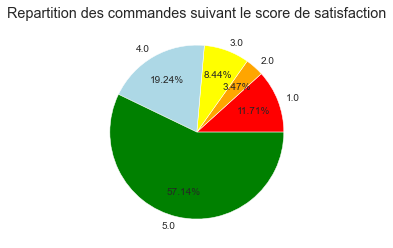

In [25]:
# satisfaction
temp = order_items[['order_id','review_score']].copy()
temp['review_score'] = temp['review_score'].round()
grp=temp.groupby(['review_score'])
sat = grp.size()


plt.pie(sat,labels=[1.,2.,3.,4.,5.],colors=['red','orange','yellow','lightblue','green'],
        autopct=lambda x: str(round(x,2))+'%',pctdistance=0.7,labeldistance=1.1)
plt.title('Repartition des commandes suivant le score de satisfaction')

Les clients sont donc tres majoritairement satisfaits  

On va maintenant simplifier les categories de produits en utilisant des categories plus globales

In [26]:
print(list(df['product_category_name'].unique()))

['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery', 'garden_tools', 'housewares', 'telephony', 'health_beauty', 'books_technical', 'fashion_bags_accessories', 'bed_bath_table', 'sports_leisure', 'consoles_games', 'office_furniture', 'luggage_accessories', 'food', 'agro_industry_and_commerce', 'electronics', 'computers_accessories', 'construction_tools_construction', 'audio', 'baby', 'construction_tools_lights', 'toys', 'stationery', 'industry_commerce_and_business', 'watches_gifts', 'auto', nan, 'home_appliances', 'kitchen_dining_laundry_garden_furniture', 'air_conditioning', 'home_confort', 'fixed_telephony', 'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene', 'signaling_and_security', 'musical_instruments', 'small_appliances', 'costruction_tools_garden', 'art', 'home_construction', 'books_general_interest', 'party_supplies', 'construction_tools_safety', 'cine_photo', 'fashion_underwear_beach', 'fashion_male_clothing', 'food_drink', 'drinks', 'furniture_living_room'

In [27]:
list_new_cat = ['health_beauty','sports_leisures','baby_toys','home','furnitures',
                'tools_garden','technology','fashion_clothes_accessories',
                'gifts_flowers','books_dvds_media_stationery','others']

df['main_category'] = np.where((df['product_category_name'].str.contains('perfu|health|beauty')==True),
                                   'health_beauty',
                         np.where((df['product_category_name'].str.contains('fashion|lugg')==True),
                                   'fashion_clothes_accessories',
                         np.where((df['product_category_name'].str.contains('baby|toy|diaper')==True),
                                   'baby_toys',
                         np.where((df['product_category_name'].str.contains('book|cd|dvd|media|station|cine')==True),
                                   'books_dvd_media_stationery',
                         np.where((df['product_category_name'].str.contains('tool|garden')==True),
                                   'tools_garden',
                         np.where((df['product_category_name'].str.contains('phon|tablet|compu|elect')==True),
                                   'technology',
                         np.where((df['product_category_name'].str.contains('furniture|bed')==True),
                                   'furnitures',
                         np.where((df['product_category_name'].str.contains('home|house|applianc|bath')==True),
                                  'home',
                         np.where((df['product_category_name'].str.contains('gift|flow|stuff')==True),
                                   'gifts_flowers',
                         np.where((df['product_category_name'].str.contains('sport|music')==True),
                                   'sports_leisures',
                        'others'))))))))))


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   seller_id                      110197 non-null  object        
 4   price                          110197 non-null  float64       
 5   freight_value                  110197 non-null  float64       
 6   customer_id                    110197 non-null  object        
 7   order_status                   110197 non-null  object        
 8   order_purchase_timestamp       110197 non-null  datetime64[ns]
 9   order_delivered_customer_date  110189 non-null  datetime64[ns]
 10  nb_diff_payment                110194 non-null  float64       
 11  

Text(0.5, 1.0, 'Nombre de produits achetes par nouvelle categorie')

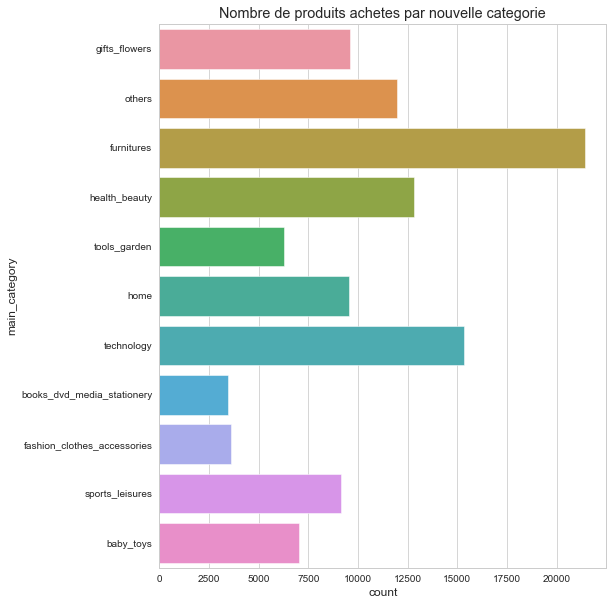

In [29]:
fig = plt.figure(figsize=(8,10))
sns.countplot(data=df,y='main_category')

plt.title('Nombre de produits achetes par nouvelle categorie')

In [30]:
df.drop(['product_category_name'],axis=1,inplace=True)

on regarde le nombre de commande par client

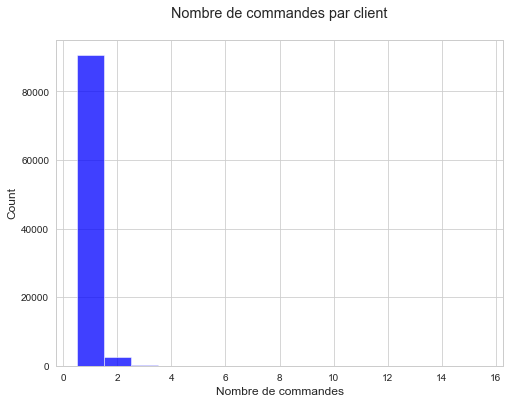

In [31]:
fig = plt.figure(figsize=(8,6))
sns.histplot(df.groupby('customer_unique_id').agg({'order_id':'nunique'}),x='order_id',discrete=True, color='b')
plt.title('Nombre de commandes par client\n ')
plt.xlabel('Nombre de commandes')
plt.show()

Les clients n'ayant passé qu'une seule commande sont tres majoritaires. Il ne va donc pas etre possible de faire une segmentation RFM, en raison de l'absence de frequence.

Une autre consequence est qu'il n'est pas possible de connaitre la categorie de produits preferee par un client.

On va regarder le nombre moyen de produits par client

Text(0.5, 0, 'Nombre de produits')

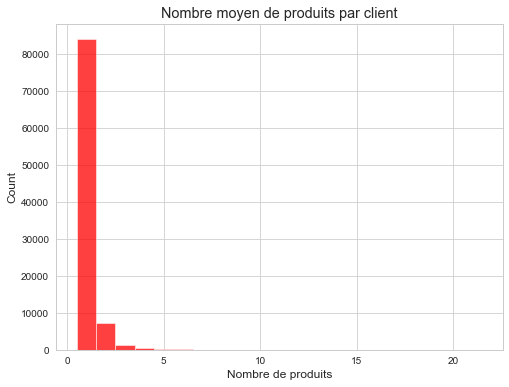

In [32]:
# nombre de produits par client par commande
products_per_order_per_client = df.groupby(['customer_unique_id','order_id']).agg({'order_item_id':'count'})

# nombre moyen de produits par client
products_per_client = products_per_order_per_client.groupby('customer_unique_id').agg({'order_item_id':'mean'})

# renommage de la colonne order_item_id par mean_nb_items
products_per_client = products_per_client.rename(columns={'order_item_id':'mean_nb_items'})

fig = plt.figure(figsize=(8,6))
sns.histplot(data=products_per_client,x='mean_nb_items',discrete=True, color='red')
plt.title('Nombre moyen de produits par client')
plt.xlabel('Nombre de produits')

Pour avoir une idee des categories qui interessent un client, il faut connaitre quel est la proportion d'articles par categorie par rapport au nombre d'articles achetes par le client. Meme si dans la base de donnee actuelle les categories contiendront majoritairement des 0 et des 1, cela pourra avoir une utilite pour Olist si les clients deja inscrits dans la base repasse des commandes.

In [33]:
category_per_client = df.groupby(['customer_unique_id','main_category']).agg({'order_item_id':'count'}).unstack()

# supression du niveau 0 du multi_index_columns
category_per_client.columns=category_per_client.columns.droplevel(0)
list_col = category_per_client.columns

# remplacement des valeurs manquantes par 0
category_per_client.fillna(0,inplace=True)

#ajout d'une colonne contenant le nombre de produits achetes par le client
category_per_client['Total_items'] = category_per_client.sum(axis=1)

# remplacement du nombre d'articles par la proportion d'articles de la categorie par rapport au nombre total 
for col in list_col :
    category_per_client[col] = category_per_client[col]/category_per_client['Total_items']

# remise de l'identifiant client en colonne
category_per_client.reset_index(inplace=True)

category_per_client.head()

main_category,customer_unique_id,baby_toys,books_dvd_media_stationery,fashion_clothes_accessories,furnitures,gifts_flowers,health_beauty,home,others,sports_leisures,technology,tools_garden,Total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [34]:
category_per_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_unique_id           93358 non-null  object 
 1   baby_toys                    93358 non-null  float64
 2   books_dvd_media_stationery   93358 non-null  float64
 3   fashion_clothes_accessories  93358 non-null  float64
 4   furnitures                   93358 non-null  float64
 5   gifts_flowers                93358 non-null  float64
 6   health_beauty                93358 non-null  float64
 7   home                         93358 non-null  float64
 8   others                       93358 non-null  float64
 9   sports_leisures              93358 non-null  float64
 10  technology                   93358 non-null  float64
 11  tools_garden                 93358 non-null  float64
 12  Total_items                  93358 non-null  float64
dtypes: float64(12), 

Nous allons maintenant nous interesser a la **temporalite** :
- delais moyen de livraison des commandes
- nombre de commandes par mois et quel est le mois prefere d'achat d'un client
- le nombre de jours depuis la derniere commande d'un client

In [35]:
# creation de la colonne delivery_nb_days et suppression de la colonne order_delivered_customer_date
df['delivery_nb_days'] = (df.order_delivered_customer_date - df.order_purchase_timestamp).dt.round('1d').dt.days
df.drop('order_delivered_customer_date',axis=1,inplace=True)

Text(0.5, 0, 'Nombre de jours')

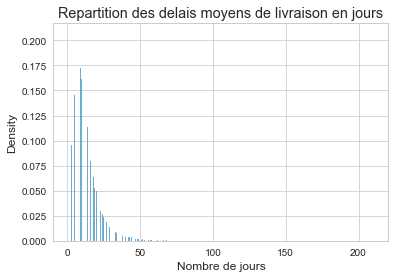

In [36]:
# representation de la distribution des delais moyens de livraison
fig = plt.figure(figsize=(6,4))
sns.histplot(data=df,x='delivery_nb_days',stat='density')
plt.title('Repartition des delais moyens de livraison en jours')
plt.xlabel('Nombre de jours')

In [37]:
print('En moyenne les livraisons se font en {} jours et 10 % des livraisons prennent plus de {} jours'\
      .format(round(df['delivery_nb_days'].mean()),df['delivery_nb_days'].quantile(0.9)))

En moyenne les livraisons se font en 12 jours et 10 % des livraisons prennent plus de 23.0 jours


<Figure size 576x432 with 0 Axes>

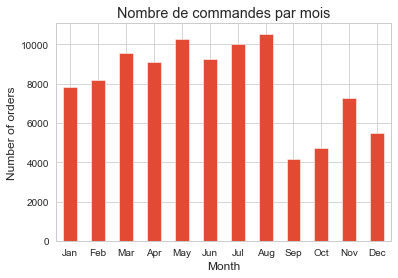

In [38]:
# visualisation du nombre de commandes par mois
month_order = order_items.groupby(order_items['order_purchase_timestamp'].dt.month).agg({'order_id':'nunique'})

fig = plt.figure(figsize=(8,6))
month_order.plot(kind='bar',title='Nombre de commandes par mois',xlabel='Month',ylabel='Number of orders',legend=False)
plt.xticks(np.arange(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
           rotation='horizontal')
plt.show()

Il y a visiblement un creux en septembre et octobre et curieusement en decembre

In [39]:
# creation de la colonne purchase_month
df['purchase_month'] = df['order_purchase_timestamp'].dt.month

In [40]:
# nombre de jours entre la date finale du data et la derniere commande du client
recent_orders=df.groupby('customer_unique_id').agg({'order_purchase_timestamp': 'max'})


final_date = df['order_purchase_timestamp'].max()
recent_orders['last_order_delay'] = [(final_date-y[0]).round('1d').days\
                                     for x,y in recent_orders.iterrows()]

recent_orders.drop('order_purchase_timestamp',axis=1,inplace=True)
recent_orders.reset_index(inplace=True)

recent_orders.head()

,customer_unique_id,last_order_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,537
3,0000f6ccb0745a6a4b88665a16c9f078,321
4,0004aac84e0df4da2b147fca70cf8255,288


En ce qui concerne la **geolocalisation** des clients, on sait que 40 % des clients viennent de l'etat de Sao Paulo ce qui n'est pas etonnant puisque c'est l'etat le plus peuple du Bresil. Au lieu d'utiliser les longitude et latitude, il est sans doute plus utile d'utiliser la distance du client a Olist. Pour calculer cette distance on utilise la distance de Haversine :  
$$d=2*r*arcsin(\sqrt{h})$$

ou $r$ est le rayon de la terre et $h=\sin^2(\frac{lat2-lat1}{2})+\cos(lat1)*\cos(lat2)*\sin^2(\frac{lng2-lng1}{2})$

les longitudes et latitudes etant exprimees en radian.
Nous utiliserons les unites de mesure SI soit $r=6371 km$

In [41]:
def haver_dist(lat1,lat2,lng1,lng2):
    '''Return la distance de Haversine en km entre deux points
    Args: latitudes et longitudes des deux point en radians'''
    r=6371
    #calcul de h
    h=sin((lat2-lat1)/2)**2+cos(lat1)*cos(lat2)*sin((lng2-lng1)/2)**2
    return 2*r*asin(sqrt(h))

Le probleme est que certain clients ont un code non repertorie dans geo, de meme pour leur ville , comme on peut le voir ci dessous

In [42]:
cp = list(geo['geolocation_zip_code_prefix'].unique())
ccp = list(client['customer_zip_code_prefix'].unique())
print('nombre de codes client inexistants dans geo : ',len(set(ccp)-set(cp)))

cities = list(geo['geolocation_city'].unique())
cl_cities = list(client['customer_city'].unique())
print('nombre de villes de client inexistantes dans geo : ',
      len(set(cl_cities)-set(cities)))

nombre de codes client inexistants dans geo :  157
nombre de villes de client inexistantes dans geo :  50


On va donc travailler par etat en prenant la moyenne des longitudes et latitudes

In [43]:
states = geo[['geolocation_state','geolocation_lat','geolocation_lng']].groupby(['geolocation_state']).mean()

# latitude et longitude de olist et des etats en radians
olist_lat = -25.43045*pi/180
olist_lng = -49.29207*pi/180
states['geolocation_lat'] = states['geolocation_lat']*pi/180
states['geolocation_lng'] = states['geolocation_lng']*pi/180

#ajout de la colonne contenant la distance de Haversine entre l'etat du client et olist
states['distance_H'] = [round(haver_dist(olist_lat,lat,olist_lng,lng),2) \
                        for lat,lng in zip(states.geolocation_lat,states.geolocation_lng)]


In [44]:
client_geo = df[['customer_unique_id','customer_city','customer_state']]
states.reset_index(inplace=True)
t = pd.merge(client_geo,states[['geolocation_state','distance_H']],
             how='left',left_on='customer_state',right_on='geolocation_state')

t.shape

(110197, 5)

In [45]:
#suppression de la colonne geolocation_state qui est un doublon par rapport a la colonne customer_state
t.drop('geolocation_state',axis=1,inplace=True)

#certains clients ont plusieurs villes attribuees, on ne garde que la premiere
t.drop_duplicates(subset = ['customer_unique_id'], keep='first', inplace=True)
t.shape

(93358, 4)

On peut maintenant creer le dataset des clients


In [46]:
customers = df.groupby('customer_unique_id').agg({'order_id':'nunique','price':'sum','freight_value': 'sum',
                                               'nb_diff_payment':'mean','nb_payment_installments':'mean',
                                               'delivery_nb_days':'mean','review_score':'mean',
                                                'purchase_month':lambda x:x.value_counts().index[0]})

# renommage des colonnes en accord avec le contenu
customers = customers.rename(columns={'order_id':'nb_orders','price':'invoiced','freight_value':'freight_total',
                                   'nb_diff_payment':'mean_diff_payment',
                                    'nb_payment_installments':'mean_payment_installments',
                                  'delivery_nb_days':'mean_delivery_nb_days','review_score':'mean_review_score',
                                   'purchase_month':'best_purchase_month'})


Nous allons joindre les differents data crees plus haut concernant les categories, les produits par client, etc...

In [47]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nb_orders                  93358 non-null  int64  
 1   invoiced                   93358 non-null  float64
 2   freight_total              93358 non-null  float64
 3   mean_diff_payment          93357 non-null  float64
 4   mean_payment_installments  93357 non-null  float64
 5   mean_delivery_nb_days      93350 non-null  float64
 6   mean_review_score          93358 non-null  float64
 7   best_purchase_month        93358 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.4+ MB


Nous allons remplacer les valeurs manquantes par la valeur la plus frequente

In [48]:
for col in ['mean_diff_payment','mean_payment_installments','mean_delivery_nb_days']:
    customers[col] = customers[col].fillna(customers[col].mode()[0])

In [49]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nb_orders                  93358 non-null  int64  
 1   invoiced                   93358 non-null  float64
 2   freight_total              93358 non-null  float64
 3   mean_diff_payment          93358 non-null  float64
 4   mean_payment_installments  93358 non-null  float64
 5   mean_delivery_nb_days      93358 non-null  float64
 6   mean_review_score          93358 non-null  float64
 7   best_purchase_month        93358 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.4+ MB


In [50]:
#utilisation d'une copie de customers en cas de pb de codage
test = customers.copy()
test = pd.merge(test,category_per_client,how='left',on='customer_unique_id')
test = pd.merge(test,products_per_client,how='left',on='customer_unique_id')
test = pd.merge(test,recent_orders,how='left',on='customer_unique_id')


In [51]:
test = pd.merge(test,t,how='left',on='customer_unique_id')
test.shape

(93358, 26)

In [52]:
test.head()


,customer_unique_id,nb_orders,invoiced,freight_total,mean_diff_payment,mean_payment_installments,mean_delivery_nb_days,mean_review_score,best_purchase_month,baby_toys,...,others,sports_leisures,technology,tools_garden,Total_items,mean_nb_items,last_order_delay,customer_city,customer_state,distance_H
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,6.0,5.0,5,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,111,cajamar,SP,337.74
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,3.0,4.0,5,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,114,osasco,SP,337.74
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,26.0,3.0,3,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,537,sao jose,SC,201.89
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,20.0,4.0,10,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,321,belem,PA,2535.24
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,13.0,5.0,11,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,288,sorocaba,SP,337.74


In [53]:
customers = test.copy()
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_unique_id           93358 non-null  object 
 1   nb_orders                    93358 non-null  int64  
 2   invoiced                     93358 non-null  float64
 3   freight_total                93358 non-null  float64
 4   mean_diff_payment            93358 non-null  float64
 5   mean_payment_installments    93358 non-null  float64
 6   mean_delivery_nb_days        93358 non-null  float64
 7   mean_review_score            93358 non-null  float64
 8   best_purchase_month          93358 non-null  int64  
 9   baby_toys                    93358 non-null  float64
 10  books_dvd_media_stationery   93358 non-null  float64
 11  fashion_clothes_accessories  93358 non-null  float64
 12  furnitures                   93358 non-null  float64
 13  gifts_flowers   

Nous allons ajouter le calcul du prix moyen par commande du prix moyen de fret.  
Nous allons remplacer la valeur de la colonne invoiced par le total paye par le client. 

In [54]:
customers['mean_price_per_order'] = customers['invoiced']/customers['nb_orders']
customers['mean_freight_per_order'] = customers['freight_total']/customers['nb_orders']
customers['invoiced'] = customers['invoiced']+customers['freight_total']

#suppression de la colonne freight_total qui devient repetitive
customers.drop('freight_total',axis=1,inplace=True)

Etude des **vendeurs**

In [55]:
category_per_seller = df.groupby(['seller_id','main_category']).agg({'order_item_id':'count'}).unstack()

# supression du niveau 0 du multi_index_columns
category_per_seller.columns = category_per_seller.columns.droplevel(0)
list_col = category_per_seller.columns

# remplacement des valeurs manquantes par 0
category_per_seller.fillna(0,inplace=True)

#ajout d'une colonne contenant le nombre de produits achetes par le client
category_per_seller['Total_items']=category_per_seller.sum(axis=1)

# remplacement du nombre d'articles par la proportion d'articles de la categorie par rapport au nombre total 
for col in list_col :
    category_per_seller[col]=category_per_seller[col]/category_per_seller['Total_items']

# remise de l'identifiant client en colonne
category_per_seller.reset_index(inplace=True)

category_per_seller.head()

main_category,seller_id,baby_toys,books_dvd_media_stationery,fashion_clothes_accessories,furnitures,gifts_flowers,health_beauty,home,others,sports_leisures,technology,tools_garden,Total_items
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,3.0
1,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,234.0
2,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,54.0
3,003554e2dce176b5555353e4f3555ac8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0
4,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.928571,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,168.0


In [56]:
seller = df.groupby('seller_id').agg({'customer_unique_id':'nunique','order_id':'nunique','price':'sum',
                                    'freight_value': 'sum','delivery_nb_days':'mean','review_score':'mean'})

# renommage des colonnes en accord avec le contenu
seller = seller.rename(columns={'customer_unique_id':'nb_customers','order_id':'nb_orders','price':'turnover',
                              'freight_value':'freight_total','delivery_nb_days':'mean_delivery_nb_days',
                              'review_score':'mean_review_score'})



In [57]:
seller.describe()

,nb_customers,nb_orders,turnover,freight_total,mean_delivery_nb_days,mean_review_score
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000
mean,32.624916,32.935690,4451.682865,740.160148,12.117215,4.135750
std,104.067700,105.407111,13926.965314,2337.561469,7.108856,0.809888
min,1.000000,1.000000,6.500000,0.750000,1.000000,1.000000
25%,2.000000,2.000000,219.800000,50.640000,8.250000,3.875000
50%,7.000000,7.000000,846.175000,161.735000,11.000000,4.250000
75%,22.000000,22.000000,3497.880000,579.740000,14.128024,4.684743
max,1790.000000,1819.000000,226987.930000,51236.640000,190.000000,5.000000


Text(0.5, 0, 'Nombre de vendeurs')

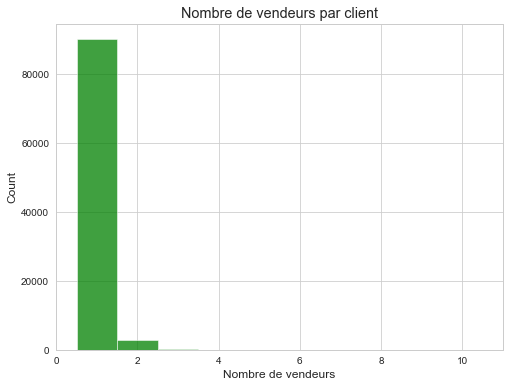

In [58]:
seller_per_customer = df[['customer_unique_id','seller_id']].groupby('customer_unique_id').agg({'seller_id':'nunique'})

fig = plt.figure(figsize=(8,6))
sns.histplot(data=seller_per_customer,x='seller_id',discrete=True, color='green')
plt.title('Nombre de vendeurs par client')
plt.xlabel('Nombre de vendeurs')

<Figure size 576x432 with 0 Axes>

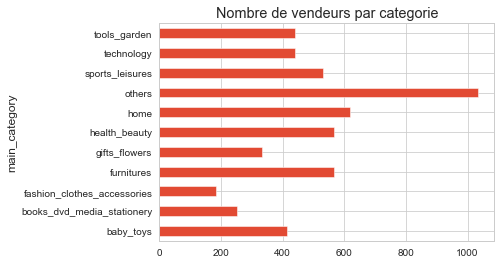

In [59]:
seller_per_category = df[['main_category','seller_id']].groupby('main_category').agg({'seller_id':'nunique'})

fig = plt.figure(figsize=(8,6))
seller_per_category.plot(kind='barh',title='Nombre de vendeurs par categorie',legend=False)


plt.show()

On remplace le freight_total par la moyenne de freight par commande

In [60]:
seller['mean_freight'] = seller['freight_total']/seller['nb_orders']
seller.drop('freight_total',axis=1,inplace=True)

In [61]:
# ajout des categories
seller = pd.merge(seller,category_per_seller,how='left',on='seller_id')

#### Exploration du dataset client

Nous allons dans un premier temps regarder s'il existe des valeurs aberrantes, puis etudier les correlations eventuelles

In [62]:
customers.describe()

,nb_orders,invoiced,mean_diff_payment,mean_payment_installments,mean_delivery_nb_days,mean_review_score,best_purchase_month,baby_toys,books_dvd_media_stationery,fashion_clothes_accessories,...,others,sports_leisures,technology,tools_garden,Total_items,mean_nb_items,last_order_delay,distance_H,mean_price_per_order,mean_freight_per_order
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,...,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,1.033420,165.168210,1.043872,2.965951,12.524327,4.140056,6.032156,0.068452,0.033268,0.033722,...,0.110789,0.083779,0.141386,0.052643,1.180370,1.139531,237.519527,704.308362,137.508262,22.779203
std,0.209097,226.292101,0.364435,2.717719,9.550578,1.291998,3.226110,0.251017,0.178398,0.179109,...,0.311992,0.275590,0.347101,0.221655,0.620857,0.527075,152.596929,607.008198,209.860279,21.459707
min,1.000000,9.590000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,174.830000,0.850000,0.000000
25%,1.000000,63.010000,1.000000,1.000000,7.000000,4.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,114.000000,337.740000,46.000000,13.880000
50%,1.000000,107.780000,1.000000,2.000000,10.000000,5.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,219.000000,337.740000,86.990000,17.240000
75%,1.000000,182.510000,1.000000,4.000000,16.000000,5.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,346.000000,795.310000,149.900000,24.110000
max,15.000000,13664.080000,26.000000,26.000000,210.000000,5.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,24.000000,21.000000,713.000000,3361.590000,13440.000000,1794.960000


Il existe des valeurs curieuses que l'on va regarder de plus pres

Text(0, 0.5, 'prix facture')

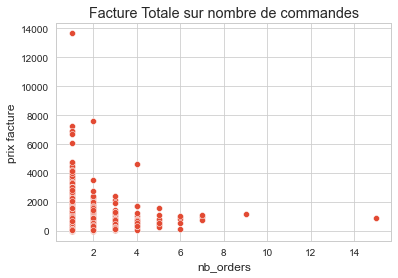

In [63]:
# visualisation du prix de la facture sur le nombre de commandes
fig=plt.figure(figsize=(6,4))
sns.scatterplot(data=customers, x='nb_orders',y='invoiced')
plt.title('Facture Totale sur nombre de commandes')
plt.xlabel('nb_orders')
plt.ylabel('prix facture')

In [64]:
# la commande la plus onereuse
customers[customers['invoiced']==customers['invoiced'].max()]

,customer_unique_id,nb_orders,invoiced,mean_diff_payment,mean_payment_installments,mean_delivery_nb_days,mean_review_score,best_purchase_month,baby_toys,books_dvd_media_stationery,...,technology,tools_garden,Total_items,mean_nb_items,last_order_delay,customer_city,customer_state,distance_H,mean_price_per_order,mean_freight_per_order
3724,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,1.0,1.0,18.0,1.0,9,0.0,0.0,...,1.0,0.0,8.0,8.0,334,rio de janeiro,RJ,690.76,13440.0,224.08


C'est une commande constituee de 8 articles de technologie donc c'est une valeur possible, meme si le fret est aussi eleve.

In [65]:
# nb_orders max et facture faible
customers[customers['nb_orders']==customers['nb_orders'].max()]

,customer_unique_id,nb_orders,invoiced,mean_diff_payment,mean_payment_installments,mean_delivery_nb_days,mean_review_score,best_purchase_month,baby_toys,books_dvd_media_stationery,...,technology,tools_garden,Total_items,mean_nb_items,last_order_delay,customer_city,customer_state,distance_H,mean_price_per_order,mean_freight_per_order
51431,8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,1.0,1.4,4.2,5.0,8,0.0,0.0,...,0.0,0.066667,15.0,1.0,9,sao paulo,SP,337.74,47.642,10.976


les valeurs sont coherentes 

Text(0, 0.5, 'prix facture')

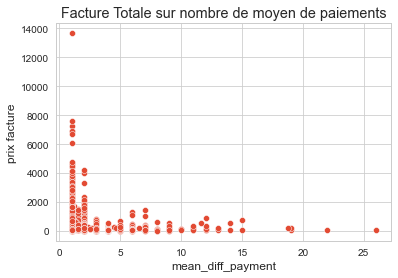

In [66]:
fig=plt.figure(figsize=(6,4))
sns.scatterplot(data=customers, x='mean_diff_payment',y='invoiced')
plt.title('Facture Totale sur nombre de moyen de paiements')
plt.xlabel('mean_diff_payment')
plt.ylabel('prix facture')

In [67]:
# la moyenne du nombre de paiements differents eleves pour une facrure faible
customers[customers['mean_diff_payment']==customers['mean_diff_payment'].max()]

,customer_unique_id,nb_orders,invoiced,mean_diff_payment,mean_payment_installments,mean_delivery_nb_days,mean_review_score,best_purchase_month,baby_toys,books_dvd_media_stationery,...,technology,tools_garden,Total_items,mean_nb_items,last_order_delay,customer_city,customer_state,distance_H,mean_price_per_order,mean_freight_per_order
31650,569aa12b73b5f7edeaa6f2a01603e381,1,62.68,26.0,26.0,15.0,5.0,6,0.0,0.0,...,0.0,0.0,1.0,1.0,448,sao paulo,SP,337.74,49.99,12.69


Apres verification, ce n'est pas le seul client a etale sa facture en paiment de moins de 3 euros. Cette commande est un meuble. On garde cette valeur  

Il reste deux valeurs curieuses : les valeurs max du nombre de jours moyen de delais de livraison et du prix moyen de fret

In [68]:
customers[customers['mean_delivery_nb_days']==customers['mean_delivery_nb_days'].max()]

,customer_unique_id,nb_orders,invoiced,mean_diff_payment,mean_payment_installments,mean_delivery_nb_days,mean_review_score,best_purchase_month,baby_toys,books_dvd_media_stationery,...,technology,tools_garden,Total_items,mean_nb_items,last_order_delay,customer_city,customer_state,distance_H,mean_price_per_order,mean_freight_per_order
27092,4a2519b6991378f6f2ce5ed22d308f03,1,245.68,1.0,1.0,210.0,1.0,2,0.0,0.0,...,0.0,0.0,1.0,1.0,554,montanha,ES,1077.75,229.9,15.78


C'est a priori compatible avec le score de 1 sur la commande, bien que ne comprenant pas le portuguais il semble que les notes de 1 soient souvent associees a des commentaires negatifs sur la livraison.

In [69]:
customers[customers['mean_freight_per_order']==customers['mean_freight_per_order'].max()]

,customer_unique_id,nb_orders,invoiced,mean_diff_payment,mean_payment_installments,mean_delivery_nb_days,mean_review_score,best_purchase_month,baby_toys,books_dvd_media_stationery,...,technology,tools_garden,Total_items,mean_nb_items,last_order_delay,customer_city,customer_state,distance_H,mean_price_per_order,mean_freight_per_order
93346,fff5eb4918b2bf4b2da476788d42051c,1,2844.96,1.0,1.0,14.0,5.0,7,0.0,0.0,...,0.0,0.0,6.0,6.0,58,campina grande,PB,2490.87,1050.0,1794.96


La encore cela parait etre une valeur possible.  

**Etude des correlations**

Pour les clients

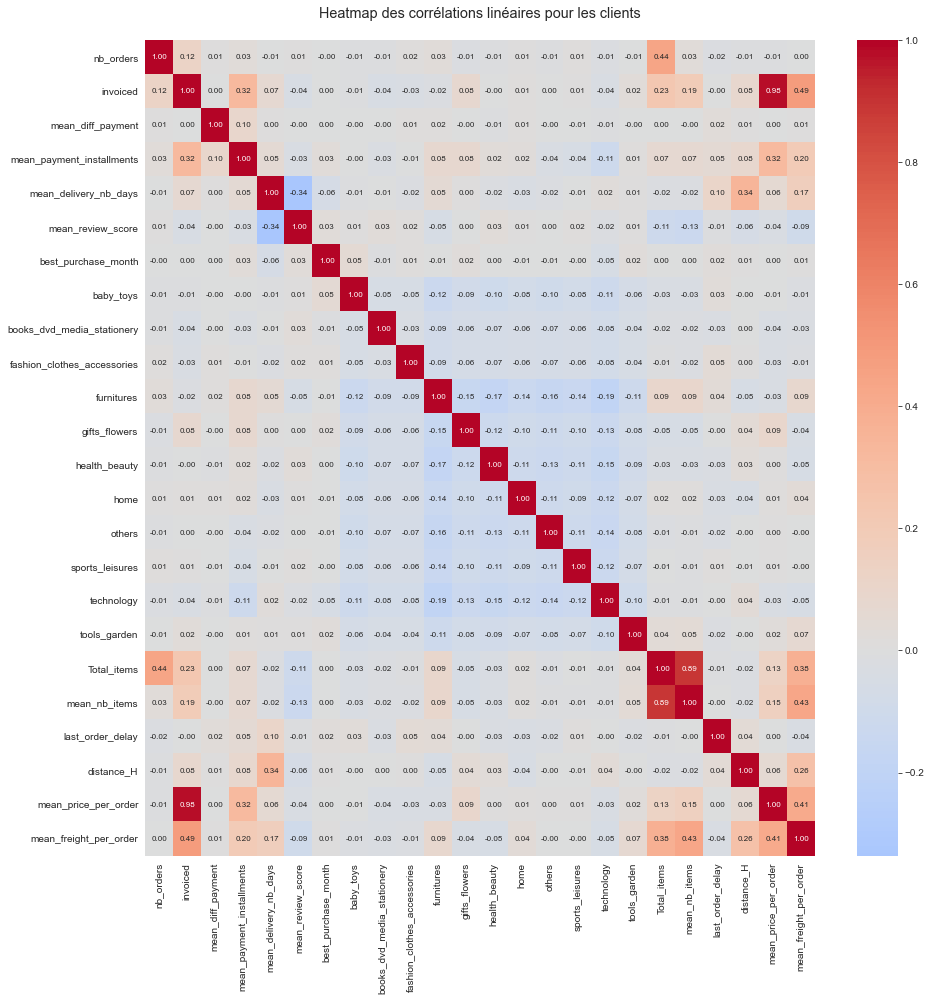

In [70]:
corr = customers.corr()

fig,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr,annot=True,fmt=".2f",annot_kws={'size':8},center=0,cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires pour les clients\n")
plt.show()

La seule correlation forte est le prix moyen par commande avec la facture ce qui est logique puisque tres majoritairement les clients n'ont passe, pour l'instant, qu'une commande. Il faut esperer pour les vendeurs que cette correlation va diminuer  

On a un fichier utilisable pour segmenter.

In [71]:
customers.set_index('customer_unique_id').to_csv('customers.csv')

Etude des correlations pour les vendeurs

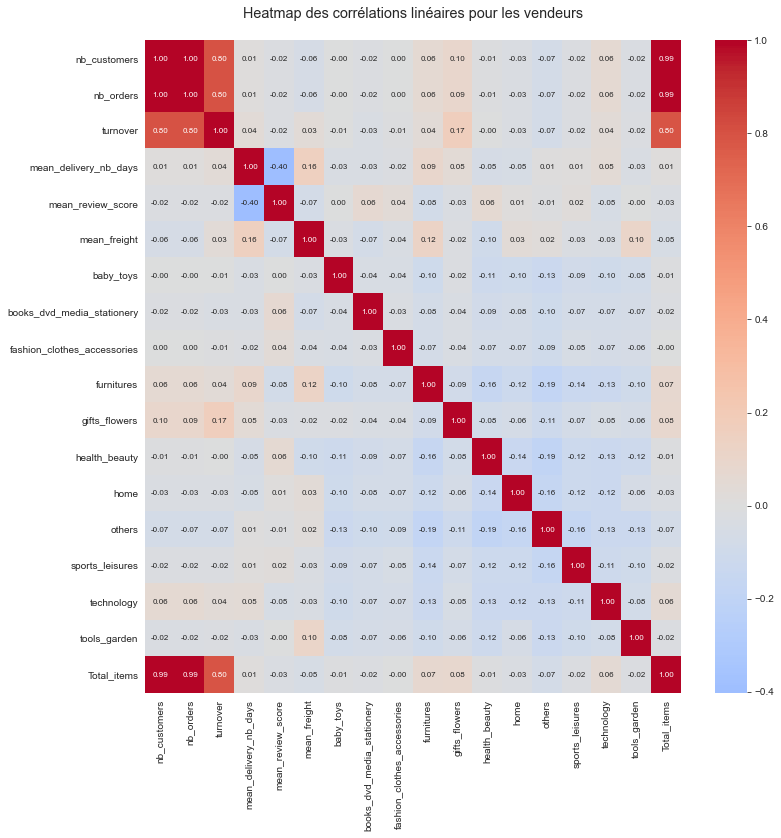

In [72]:
corr = seller.corr()

fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr,annot=True,fmt=".2f",annot_kws={'size':8},center=0,cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires pour les vendeurs\n")
plt.show()

Puisqu'actuellement en tres forte majorite, un client correspond a une commande, les colonnes nb_customers et nb_orders sont totalement correlees.

In [73]:
# fichier pour la segmentation vendeurs
seller.set_index('seller_id').to_csv('seller.csv')

Lien client_vendeur

In [74]:
client_seller = df[['customer_unique_id','seller_id']].copy()

client_seller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   customer_unique_id  110197 non-null  object
 1   seller_id           110197 non-null  object
dtypes: object(2)
memory usage: 7.5+ MB


In [75]:
client_seller.drop_duplicates(inplace=True)

In [76]:
client_seller.set_index('customer_unique_id').to_csv('client_seller.csv')